<a href="https://colab.research.google.com/github/NazarKarpiuk/kerasTitanic/blob/main/kerasTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras as k
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
upload_csv = files.upload()

data_frame = pd.read_csv(io.BytesIO(upload_csv["titanic.csv"]))

Saving titanic.csv to titanic (3).csv


In [ ]:
input_names = ["Age", "Sex", "Pclass"]
output_names = ["Survived"]

raw_input_data = data_frame[input_names]
raw_output_data = data_frame[output_name]

max_age = 100
encoders = {"Age": lambda age: [age / max_age],
            "Sex": lambda gen: {"male": [0], "female": [1]}.get(gen),
            "Pclass": lambda pclass: {1: [1,0,0], 2: [0,1,0], 3: [0,0,1]}.get(pclass),
            "Survived": lambda s_value: [s_value]}

def dataframe_to_dict(df):
  result = dict()
  for column in df.columns:
    values = data_frame[column].values 
    result[column] = values
  return result

def make_supervised(df):
  raw_input_data = data_frame[input_names]
  raw_output_data = data_frame[output_name]
  return {"inputs": dataframe_to_dict(raw_input_data),
          "outputs": dataframe_to_dict(raw_output_data)} 

def encode(data):
  vectors = []
  for data_name, data_values in data.items():
    encoded = list(map(encoders[data_name], data_values))
    vectors.append(encoded)
  formated = []
  for vector_raw in list(zip(*vectors)):
    vector = []
    for element in vector_raw:
      for e in element:
          vector.append(e)
    formated.append(vector)
  return formated

supervised = make_supervised(data_frame)
encoded_inputs = np.array(encode(supervised["inputs"]))
encoded_outputs = np.array(encode(supervised["outputs"]))

train_x = encoded_inputs[:600]
train_y = encoded_outputs[:600]

test_x = encoded_inputs[600:]
test_y = encoded_outputs[600:]

model = k.Sequential()
model.add(k.layers.Dense(units=5, activation="relu"))
model.add(k.layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])
fir_results = model.fit(x=train_x, y=train_y, epochs=200, validation_split=0.2)

#print(encoded_inputs)
#print(encoded_outputs)

#print(data_frame["Sex"].unique())

Epoch 1/200
15/15 [==============================] - 0s 14ms/step - loss: 0.2438 - accuracy: 0.4077 - val_loss: 0.2388 - val_accuracy: 0.4083
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.3853 - val_loss: 0.2373 - val_accuracy: 0.6750
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 0.6022 - val_loss: 0.2361 - val_accuracy: 0.6917
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2425 - accuracy: 0.6534 - val_loss: 0.2351 - val_accuracy: 0.6917
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2451 - accuracy: 0.6263 - val_loss: 0.2342 - val_accuracy: 0.6917
Epoch 6/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2421 - accuracy: 0.6331 - val_loss: 0.2334 - val_accuracy: 0.6917
Epoch 7/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2412 - accuracy: 0.6571 - val_loss: 0.2326 - val_accuracy: 0.7000
Epoch 8/200


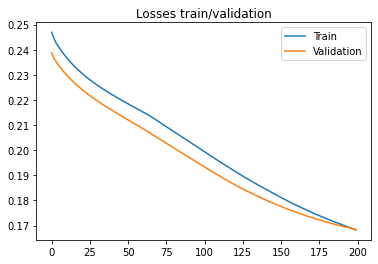

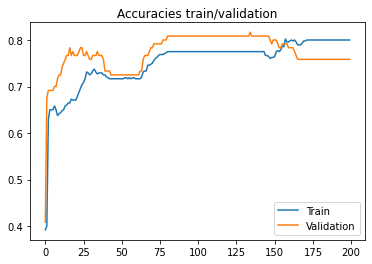

In [ ]:
plt.title("Losses train/validation")
plt.plot(fir_results.history["loss"], label="Train")
plt.plot(fir_results.history["val_loss"], label="Validation")
plt.legend()
plt.show()

plt.title("Accuracies train/validation")
plt.plot(fir_results.history["accuracy"], label="Train")
plt.plot(fir_results.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()


In [ ]:
predicted_test = model.predict(test_x)
real_data = data_frame.iloc[600:][input_names+output_names]
real_data["PSurvived"] = predicted_test
print(real_data)

model.save_weights("weights.h5")
files.download("weights.h5")

      Age     Sex  Pclass  Survived  PSurvived
600  44.0    male       3         0   0.292002
601  35.0    male       1         1   0.348638
602  36.0    male       3         0   0.292002
603  30.0    male       3         0   0.292002
604  27.0    male       1         1   0.343780
..    ...     ...     ...       ...        ...
882  27.0    male       2         0   0.363572
883  19.0  female       1         1   0.802376
884   7.0  female       3         0   0.527866
885  26.0    male       1         1   0.343175
886  32.0    male       3         0   0.292002

[287 rows x 5 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>